<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**:Mohammad Amin Eghlimi

**Student ID**:99101173

# Linear Regression

In this exercise, we want to examine **linear regression**. For this purpose, we have prepared a dataset in the `q1.csv` file. This dataset is used to estimate the **heating load** and **cooling load** of a building based on its parameters. The parameters in this dataset are explained below:

- $X_1$: Relative Compactness
- $X_2$: Surface Area
- $X_3$: Wall Area
- $X_4$: Roof Area
- $X_5$: Overall Height
- $X_6$: Orientation
- $X_7$: Glazing Area
- $X_8$: Glazing Area Distribution
- $Y_1$: Heating Load
- $Y_2$: Cooling Load

**Note**: For the sake of simplicity, we will only focus on estimating the **heating load** in this problem. Also, please note that we have some inline questions in this notebook, for which you should write your answers in the **Answer** section below each question.

## Importing Libraries

First we import libraries that we need for this assignment.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the building (`X1`, `X2`, ..., `X8`) and heating load (`Y1`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [142]:
X, Y = None, None

### START CODE HERE ###
Data = pd.read_csv('q1.csv')
X = Data[['X1','X2','X3','X4','X5','X6','X7','X8']]
Y = Data[['Y1']]
X = np.array(X)
Y = np.array(Y)
### END CODE HERE ###

print(X.shape)
print(Y.shape)

(768, 8)
(768, 1)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:Prior to commencing with the training process, it is crucial to properly normalize the data. This important step helps to prevent any particular feature with an excessively large range of values from overriding the learning process, specifically with regard to distance-based algorithms. Furthermore, data normalization can improve the numerical stability and convergence rate of various optimization algorithms, which may underperform when input variables are of different scales. By successfully normalizing the data, all features are brought to the same common scale, and thus optimization algorithms can evaluate them equivalently during the course of learning.

In [143]:
### START CODE HERE ###

Sigma = np.std(X,axis=0)
X_bar = np.mean(X,axis=0)

X_norm = (X - X_bar)/Sigma

print(X," ",X_norm)


### END CODE HERE ###

[[9.800e-01 5.145e+02 2.940e+02 ... 2.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 3.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 4.000e+00 0.000e+00 0.000e+00]
 ...
 [6.200e-01 8.085e+02 3.675e+02 ... 3.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 4.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 4.000e-01 5.000e+00]]   [[ 2.04177671 -1.78587489 -0.56195149 ... -1.34164079 -1.76044698
  -1.81457514]
 [ 2.04177671 -1.78587489 -0.56195149 ... -0.4472136  -1.76044698
  -1.81457514]
 [ 2.04177671 -1.78587489 -0.56195149 ...  0.4472136  -1.76044698
  -1.81457514]
 ...
 [-1.36381225  1.55394308  1.12390297 ... -0.4472136   1.2440492
   1.41133622]
 [-1.36381225  1.55394308  1.12390297 ...  0.4472136   1.2440492
   1.41133622]
 [-1.36381225  1.55394308  1.12390297 ...  1.34164079  1.2440492
   1.41133622]]


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [144]:
### START CODE HERE ###
X = np.insert(X_norm, 0, 1, axis=1)
### END CODE HERE ###

print(X.shape)

(768, 9)


## Training Model Using Direct Method

We know that the loss function in linear regression is defined as:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2
$$

Here, $w$ is the weight vector and $(x_i, y_i)$ represents the $i$th data point. First, write a function that takes $X$, $Y$, and $w$ as inputs and returns the loss value in the next cell. Note that your implementation should be fully vectorized, meaning that you are not allowed to use any loops in your function and should only use functions prepared in the numpy library.

In [145]:
def loss(X, Y, w):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    w: an (n+1) by 1 weight vector
    '''
    m, n = X.shape
    loss = None
    ### START CODE HERE ###
    loss = np.sum((np.matmul(X, w) - Y) ** 2) / m
    ### END CODE HERE ###
    return loss.item()

Now, we want to calculate the weight matrix, $w$, using the direct method. By direct method, we mean finding the answer to the optimization problem below directly using linear algebra, without using iterative methods:

$$
\min_{w} \mathcal{L}(w)
$$

Question: What is the answer to this problem in terms of $X$ and $Y$?

Answer: $\hat{w}_{mle} = (X^T X)^{-1}X^T Y$

Now you should implement a function that receives $X$ and $Y$ as input and returns $w$. Note that your implementation should also be fully vectorized.

In [146]:
def direct_method(X, Y):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    '''
    w = None
    ### START CODE HERE ###
    w = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
    ### END CODE HERE ###
    return w

Finally, we want to evaluate our loss for this problem. Run the cell below to calculate the loss of your model.

In [147]:
w = direct_method(X, Y) # calculating w using direct method

print(f"loss for this problem using direct method is {loss(X, Y, w)}")

loss for this problem using direct method is 8.52693112847569


## Training Model Using Gradient Descent

Now, instead of using the direct method to calculate $w$, we want to use the **Gradient Descent** algorithm. We know that in this algorithm, in each iteration, we should update our weight vector with:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla \mathcal{L}(\mathbf{w}^{(t)})
$$

Here, $w^{t}$ represents the weight matrix in the $t$th iteration, and $\alpha$ represents the learning rate.

**Question**: Write an expression for $\nabla\mathcal{L}(\mathbf{w})$.

**Answer**:$\frac{2}{m}X^T(X\mathbf{w}-Y)$

Now, write a function that computes the gradient of $\mathcal{L}(\mathbf{w})$. This function should receive $X$, $Y$, and $\mathbf{w}$ as inputs and return an $(n+1) \times 1$ vector, which represents $\nabla\mathcal{L}(\mathbf{w})$. Note that your implementation should also be **fully vectorized**.

In [148]:
def gradient(X, Y, w):
    '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  w: an (n+1) by 1 weight vector
  '''
    m, n = X.shape
    grad = None
  ### START CODE HERE ###
    grad = 2*np.matmul(X.T,np.matmul(X,w)-Y)/m
  ### END CODE HERE ###
    return grad

Now, we are ready to implement the Gradient Descent algorithm. Complete the function below for this purpose. Note that this function receives $X$, $Y$, the learning rate, and the number of iterations as inputs. This function should return two parameters. The first parameter is $\mathbf{w}$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code. Also note that you should initialize $\mathbf{w}$ with the `randn` function.

In [149]:
def gradient_descent(X, Y, alpha, num_iter):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    alpha: learning rate
    num_iter: number of iterations of the algorithm
    '''
    m, n = X.shape
    w, loss_history = None, None 
    ### START CODE HERE ###
    w = np.random.randn(n, 1)  
    loss_history = np.zeros((num_iter, 1))  

    for i in range(num_iter):
        w = w - alpha * gradient(X, Y, w)  
        loss_history[i] = np.mean((np.matmul(X, w) - Y) ** 2)
    ### END CODE HERE ###
    return w, loss_history

Now, run the `gradient_descent` function for 5 different values of the learning rate. Plot the `loss_history` of these 5 different values in the same figure.

**Question**: Discuss the effect of the learning rate and find the best value of this parameter.

**Answer**:The gradient descent algorithm heavily relies on the chosen learning rate. If the learning rate is too small, the algorithm converges slowly while, if it's too high, the algorithm may fail to converge and even diverge. Thus, it is crucial to select an appropriate learning rate.

To determine the optimal learning rate, we observe the plots of the loss_history obtained with different learning rates. Based on our analysis, a learning rate of 0.22 offers the best compromise between the convergence speed and performance.
for the problem at hand, we suggest using a learning rate around 0.22 for the best convergence speed and performance

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\User\AppData\Local\Temp/ipykernel_8660/4139389033.py:16: RuntimeWarning: overflow encountered in square
  loss_history[i] = np.mean((np.matmul(X, w) - Y) ** 2)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\User\AppData\Local\Temp/ipykernel_8660/4139389033.py:16: RuntimeWarning: overflow encountered in square
  loss_history[i] = np.mean((np.matmul(X, w) - Y) ** 2)
C:\Users\User\AppData\Local\Temp/ipykernel_8660/4139389033.py:16: RuntimeWarning: overflow encountered in square
  loss_history[i] = np.mean((np.matmul(X, w) - Y) ** 2)
C:\Users\User\AppData\Local\Temp/ipykernel_8660/739137640.py:10: RuntimeWarning: overflow encountered in matmul
  grad = 2*np.matmul(

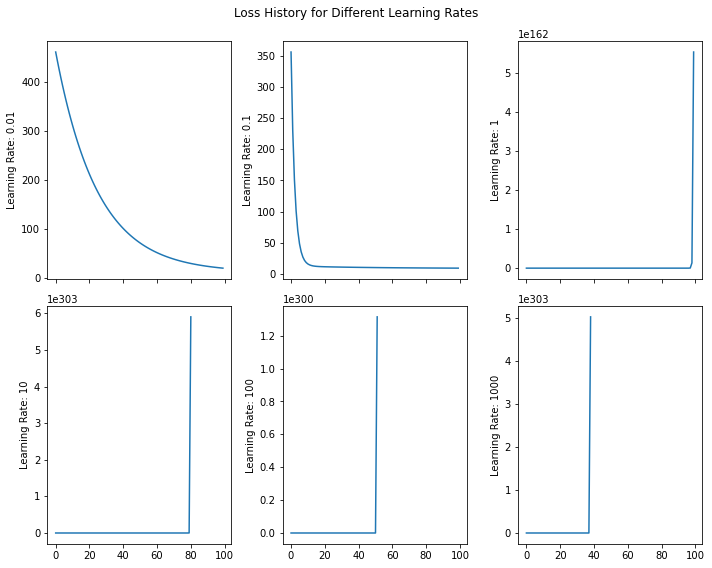

In [153]:
### START CODE HERE ###

import matplotlib.pyplot as plt

learning_rates = [0.01, 0.1, 1, 10, 100, 1000]
num_iter = 100

# Create subplots
fig, axs = plt.subplots(2,3, figsize=(10, 8), sharex=True)
fig.suptitle('Loss History for Different Learning Rates')

# Run gradient_descent for each learning rate and plot loss history

w, loss_history = gradient_descent(X, Y, 0.01, num_iter)
axs[0][0].plot(loss_history)
axs[0][0].set_ylabel(f'Learning Rate: {0.01}')
    
w, loss_history = gradient_descent(X, Y, 0.1, num_iter)
axs[0][1].plot(loss_history)
axs[0][1].set_ylabel(f'Learning Rate: {0.1}')
    
w, loss_history = gradient_descent(X, Y, 1, num_iter)
axs[0][2].plot(loss_history)
axs[0][2].set_ylabel(f'Learning Rate: {1}')
    
w, loss_history = gradient_descent(X, Y, 10, num_iter)
axs[1][0].plot(loss_history)
axs[1][0].set_ylabel(f'Learning Rate: {10}')
    
w, loss_history = gradient_descent(X, Y, 100, num_iter)
axs[1][1].plot(loss_history)
axs[1][1].set_ylabel(f'Learning Rate: {100}')
    
w, loss_history = gradient_descent(X, Y, 1000, num_iter)
axs[1][2].plot(loss_history)
axs[1][2].set_ylabel(f'Learning Rate: {1000}')
    

fig.tight_layout()
plt.show()



### END CODE HERE ###

## Conclusion

Compare the answer of two different methods that we used earlier.

**Question**: Discuss these two methods and compare them with each other. When is it better to use the direct method, and when is it better to use Gradient Descent?

**Answer**:The direct method is a computationally efficient algorithm that provides an exact solution for the weight matrix of linear regression models. Specifically, it calculates the inverse of the matrix $X^TX$ and multiplies it with the matrix product $X^TX$ to obtain the weight matrix. However, one limitation of the direct method is that it can be numerically unstable and computationally expensive when dealing with high-dimensional datasets that have large values or a singular matrix. 

In contrast, Gradient Descent is a widely used optimization algorithm that can be applied to a wide range of machine learning problems, including linear regression. The Gradient Descent algorithm does not require the matrix inversion and can be used in high-dimensional datasets. However, it is an iterative algorithm that may require more computation than the direct method to converge to the minimum of the loss function. 

To summarize, the direct method is preferable when the dataset is not very large and the matrix $X^TX$ is invertible. In such cases, the direct method is computationally efficient and provides an exact solution for the weight matrix. However, for large and high-dimensional datasets, Gradient Descent is more appropriate due to its ability to handle large datasets without the need to invert the matrix.

## (Additional Part) Stochastic Gradient Descent

When the number of data points becomes large, calculating the gradient becomes very complicated. In these circumstances, we use **Stochastic Gradient Descent**. In this algorithm, instead of using all of the data points to calculate the gradient, we use only a small number of them. We choose these small number of points randomly in each iteration. Implement this algorithm, and use it to calculate $w$, and then compare the result with the preceding parts.

In [160]:
def stochastic_gradient_descent(X, Y, k, alpha, num_iter):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    k: number of data points used in each iteration
    alpha: learning rate
    num_iter: number of iterations of the algorithm
    '''
    m, n = X.shape
    w, loss_history = None, None 
    ### START CODE HERE ###
    Y = Y.reshape(-1, 1) 
    m, n = X.shape
    w = np.zeros((n, 1))  # Initialize weights
    loss_history = np.zeros((num_iter, 1)) 
    
    for i in range(num_iter):
        indices = np.random.choice(m, k, replace=False) 
        X_batch = X[indices, :]
        Y_batch = Y[indices, :]
        w = w - alpha * gradient(X_batch, Y_batch, w)  
        loss_history[i] = np.mean((np.dot(X_batch, w) - Y_batch) ** 2)
    ### END CODE HERE ###
    return w, loss_history


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\User\AppData\Local\Temp/ipykernel_8660/3267462142.py:22: RuntimeWarning: overflow encountered in square
  loss_history[i] = np.mean((np.dot(X_batch, w) - Y_batch) ** 2)


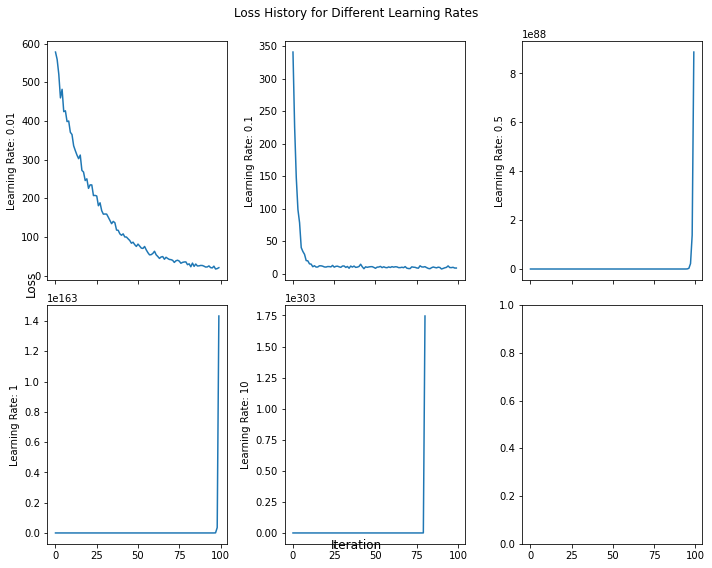

In [161]:
import matplotlib.pyplot as plt


learning_rates = [0.01, 0.1, 0.5, 1.0, 10.0]
num_iter = 100
K = 200  
# Create subplots
fig, axs = plt.subplots(2,3, figsize=(10, 8), sharex=True)
fig.suptitle('Loss History for Different Learning Rates')

# Run gradient_descent for each learning rate and plot loss history

w, loss_history = stochastic_gradient_descent(X, Y, K, 0.01, num_iter)
axs[0][0].plot(loss_history)
axs[0][0].set_ylabel(f'Learning Rate: {0.01}')
    
w, loss_history = stochastic_gradient_descent(X, Y, K, 0.1, num_iter)
axs[0][1].plot(loss_history)
axs[0][1].set_ylabel(f'Learning Rate: {0.1}')
    
w, loss_history = stochastic_gradient_descent(X, Y, K, 0.5, num_iter)
axs[0][2].plot(loss_history)
axs[0][2].set_ylabel(f'Learning Rate: {0.5}')
    
w, loss_history = stochastic_gradient_descent(X, Y, K, 1, num_iter)
axs[1][0].plot(loss_history)
axs[1][0].set_ylabel(f'Learning Rate: {1}')
    
w, loss_history = stochastic_gradient_descent(X, Y, K, 10, num_iter)
axs[1][1].plot(loss_history)
axs[1][1].set_ylabel(f'Learning Rate: {10}')
    

fig.text(0.5, 0.04, 'Iteration', ha='center', fontsize=12)


fig.text(0.04, 0.5, 'Loss', va='center', rotation='vertical', fontsize=12)

fig.tight_layout()

plt.show()